<a href="https://colab.research.google.com/github/IndioP/Projeto-AM/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IndioP/Projeto-AM

Cloning into 'Projeto-AM'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 17), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (35/35), 703.55 KiB | 2.40 MiB/s, done.


In [35]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
df = pd.read_csv("Projeto-AM/avila-tr.txt",names = names)

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_valid,y_train,y_valid = train_test_split(df.drop("Class",axis=1), df["Class"],test_size=0.2,random_state=2023)

In [7]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((8344, 10), (8344,), (2086, 10), (2086,))

In [8]:

from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
df = pd.read_csv("Projeto-AM/avila-ts.txt",names=names)

In [13]:
X_test = df.drop("Class",axis=1)
y_test = df["Class"]

In [15]:
def check_f1_test(clf,X_test,y_test):
  pred = clf.predict(X_test)
  print("f1",f1_score(pred,y_test,average="weighted"))
  print("recall",recall_score(pred,y_test,average="weighted"))
  print("precision",precision_score(pred,y_test,average="weighted"))

# KNN parameters

n_neighbors int, default=5

weights {‘uniform’, ‘distance’}, callable or None, default=’uniform’

algorithm {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

leaf_size int, default=30

p int, default=2

metric str or callable, default=’minkowski’


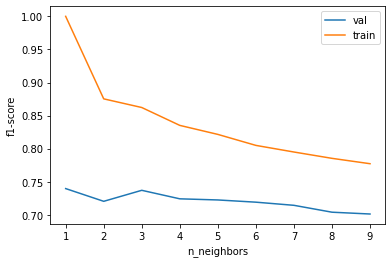

In [19]:
import numpy as np
import matplotlib.pyplot as plt

results_val = []
results_train = []
n_s = range(1,10)
for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(n_s,results_val,label='val')
plt.plot(n_s,results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
def make_df_metrics(methods,results_train,results_val):
  return pd.concat([pd.DataFrame({"x":methods,'y':results_train,'label':['train']*len(results_train)}),pd.DataFrame({"x":methods,'y':results_val,'label':['val']*len(results_val)})])


In [22]:

results_val = []
results_train = []
metrics = ['cityblock','cosine','euclidean','l1','l2','manhattan','nan_euclidean']
#'haversine'
for x in metrics:
  clf = KNeighborsClassifier(metric = x)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
  
for x in range(3,8):
  metrics.append(f'minkowski_p{x}')
  clf = KNeighborsClassifier(metric = 'minkowski',p=x)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(metrics,results_train,results_val)

(0.6, 1.0)

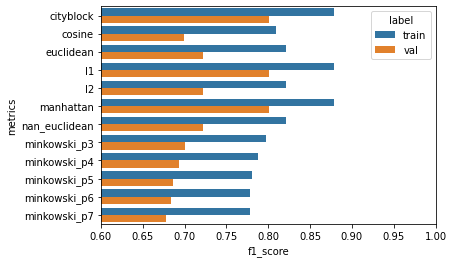

In [25]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("metrics")
plt.xlabel("f1_score")
plt.xlim(0.6, 1.0)

In [28]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(4)

,x,y,label
0,cityblock,0.878461,train
3,l1,0.878461,train
5,manhattan,0.878461,train
2,euclidean,0.821596,train
5,manhattan,0.800712,val
3,l1,0.800712,val
0,cityblock,0.800712,val
2,euclidean,0.722539,val


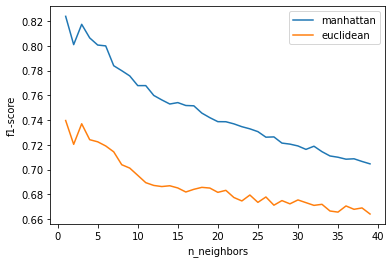

In [33]:
import numpy as np
import matplotlib.pyplot as plt

manhattan_val = []
euclidean_val = []


n_s = range(1,40)
for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors,metric='manhattan')
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  manhattan_val.append(f1_score(pred,y_valid,average="weighted"))

for n_neighbors in n_s:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors,metric='euclidean')
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  euclidean_val.append(f1_score(pred,y_valid,average="weighted"))

plt.plot(n_s,manhattan_val,label='manhattan')
plt.plot(n_s,euclidean_val,label='euclidean')

plt.ylabel("f1-score")
plt.xlabel("n_neighbors")
plt.legend()

In [34]:
clf = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')
clf.fit(X_train,y_train)
check_f1_test(clf,X_test,y_test)

f1 0.828563428389104
recall 0.8293570949506563
precision 0.8292224138422384


In [36]:
from sklearn.utils.extmath import weighted_mode
import optuna


metrics = ['cityblock','cosine','euclidean','l1','l2','manhattan','nan_euclidean']
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors",1,20)
    
    metric = trial.suggest_categorical("metric",metrics)
    
    clf = KNeighborsClassifier(
                                n_neighbors=n_neighbors,
                                metric=metric
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-03-05 16:10:01,817] A new study created in memory with name: no-name-e7ef512e-bf98-4264-925e-e5bd2e2dba64
[I 2023-03-05 16:10:02,262] Trial 0 finished with value: 0.6851831109994547 and parameters: {'n_neighbors': 19, 'metric': 'euclidean'}. Best is trial 0 with value: 0.6851831109994547.
[I 2023-03-05 16:10:02,720] Trial 1 finished with value: 0.685741726544354 and parameters: {'n_neighbors': 18, 'metric': 'l2'}. Best is trial 1 with value: 0.685741726544354.
[I 2023-03-05 16:10:03,419] Trial 2 finished with value: 0.7420388175130715 and parameters: {'n_neighbors': 19, 'metric': 'manhattan'}. Best is trial 2 with value: 0.7420388175130715.
[I 2023-03-05 16:10:03,814] Trial 3 finished with value: 0.7225385508602775 and parameters: {'n_neighbors': 5, 'metric': 'euclidean'}. Best is trial 2 with value: 0.7420388175130715.
[I 2023-03-05 16:10:04,227] Trial 4 finished with value: 0.8064721624199659 and parameters: {'n_neighbors': 4, 'metric': 'cityblock'}. Best is trial 4 with valu

{'n_neighbors': 1, 'metric': 'cityblock'}


In [37]:
optuna.visualization.plot_optimization_history(study)

In [38]:
optuna.visualization.plot_param_importances(study)

In [40]:
optuna.visualization.plot_contour(study, params=["metric", "n_neighbors"])
